## I. Feature Engineering:

In [1988]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1989]:
# let us see what data available in our data directory
for direname, _ , filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(direname, filename))

In [1990]:
# load data
data_path = "zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

In [1991]:
# data shape
print(df.shape)
# column names
print(df.columns)

(10500, 17)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


In [1992]:
# summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [1993]:
# Drop some data columns that may not be relevant to the model results
df.drop(['address', 'lat','link','lng','phone','title','color','cuisine_color'], axis=1, inplace=True)

In [1994]:
# summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cost           10154 non-null  float64
 1   cuisine        10500 non-null  object 
 2   rating_number  7184 non-null   float64
 3   rating_text    7184 non-null   object 
 4   subzone        10500 non-null  object 
 5   type           10452 non-null  object 
 6   votes          7184 non-null   float64
 7   groupon        10500 non-null  bool   
 8   cost_2         10154 non-null  float64
dtypes: bool(1), float64(4), object(4)
memory usage: 666.6+ KB
None


In [1995]:
# types of variables
# categorical variables
categorical = [var for var in df.columns if df[var].dtype in ['O','bool']]

print("There are {} categorical variables among selected columns\n".format(len(categorical)))
print("The categorical variables are: ", categorical)


There are 5 categorical variables among selected columns

The categorical variables are:  ['cuisine', 'rating_text', 'subzone', 'type', 'groupon']


In [1996]:
# check if the target variable has any na/null values
print(df.shape)
df = df[df['rating_number'].notna()]
print(df.shape)

(10500, 9)
(7184, 9)


In [1997]:
# Explore categorical variables
df[categorical].head()

cuisine rating_text  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']   Very Good   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']   Excellent   
2                                 ['Japanese']   Excellent   
3                        ['Modern Australian']   Excellent   
4                            ['Thai', 'Salad']   Excellent   

                                 subzone                    type  groupon  
0                                    CBD       ['Casual Dining']    False  
1  The Grounds of Alexandria, Alexandria                ['Café']    False  
2                      The Star, Pyrmont         ['Fine Dining']    False  
3                          Circular Quay  ['Fine Dining', 'Bar']    False  
4                              Chinatown       ['Casual Dining']    False

In [1998]:
# check missing variables
print(df[categorical].isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * df[categorical].isnull().sum() / df.shape[0])

cuisine         0
rating_text     0
subzone         0
type           21
groupon         0
dtype: int64
********
Percentages of missing values
********
cuisine        0.000000
rating_text    0.000000
subzone        0.000000
type           0.292316
groupon        0.000000
dtype: float64


In [1999]:
# check which of these variables has missing values?
cat_with_missing = [var for var in categorical if df[var].isnull().sum() > 0]
print(df[cat_with_missing].isnull().sum())

type    21
dtype: int64


In [2000]:
# get the frequency counts of the categorical variables
for var in categorical:
    print(df[var].value_counts())

['Cafe']                                                   1004
['Thai']                                                    420
['Chinese']                                                 284
['Modern Australian']                                       250
['Italian', 'Pizza']                                        217
                                                           ... 
['Pizza', 'Seafood', 'Modern Australian', 'Vegetarian']       1
['BBQ', 'Chinese', 'Hot Pot']                                 1
['Bakery', 'German']                                          1
['Steak', 'Modern Australian', 'Bar Food']                    1
['Fast Food', 'Burger', 'Coffee and Tea']                     1
Name: cuisine, Length: 1376, dtype: int64
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64
CBD                                         357
Surry Hills                                 227
Darlinghurst                        

In [2001]:
# get the percentages in each of the categorical variables
for var in categorical:
    print(df[var].value_counts() / df.shape[0])

['Cafe']                                                   0.139755
['Thai']                                                   0.058463
['Chinese']                                                0.039532
['Modern Australian']                                      0.034800
['Italian', 'Pizza']                                       0.030206
                                                             ...   
['Pizza', 'Seafood', 'Modern Australian', 'Vegetarian']    0.000139
['BBQ', 'Chinese', 'Hot Pot']                              0.000139
['Bakery', 'German']                                       0.000139
['Steak', 'Modern Australian', 'Bar Food']                 0.000139
['Fast Food', 'Burger', 'Coffee and Tea']                  0.000139
Name: cuisine, Length: 1376, dtype: float64
Average      0.626531
Good         0.266843
Very Good    0.070434
Poor         0.029092
Excellent    0.007099
Name: rating_text, dtype: float64
CBD                                         0.049694
Surry Hills

In [2002]:
# check cardinality (number of unique labels) of each catogrical variable
for var in categorical:
    us = df[var].unique()
    print(var, ' contains ', len(us), ' labels.')

cuisine  contains  1376  labels.
rating_text  contains  5  labels.
subzone  contains  520  labels.
type  contains  55  labels.
groupon  contains  2  labels.


In [2003]:
# a function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())

In [2004]:
explore_categorical(df, 'cuisine')

********** missing values **********
0
********** Labels **********
["['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"
 "['Cafe', 'Coffee and Tea', 'Salad', 'Poké']" "['Japanese']" ...
 "['American', 'Coffee and Tea']" "['Vietnamese', 'Cambodian']"
 "['Fast Food', 'Burger', 'Coffee and Tea']"]
********** frequency **********
['Cafe']                                                   1004
['Thai']                                                    420
['Chinese']                                                 284
['Modern Australian']                                       250
['Italian', 'Pizza']                                        217
                                                           ... 
['Pizza', 'Seafood', 'Modern Australian', 'Vegetarian']       1
['BBQ', 'Chinese', 'Hot Pot']                                 1
['Bakery', 'German']                                          1
['Steak', 'Modern Australian', 'Bar Food']                    1
['Fast Food', 'Burger', 'Coffee and Te

In [2005]:
explore_categorical(df, 'rating_text')

********** missing values **********
0
********** Labels **********
['Very Good' 'Excellent' 'Good' 'Average' 'Poor']
********** frequency **********
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64


In [2006]:
explore_categorical(df, 'subzone')

********** missing values **********
0
********** Labels **********
['CBD' 'The Grounds of Alexandria, Alexandria' 'The Star, Pyrmont'
 'Circular Quay' 'Chinatown' 'Kensington Street, Chippendale'
 'Establishment, CBD' 'Surry Hills' 'The Rocks Centre, The Rocks '
 'Westfield Pitt Street Mall, CBD' 'The Rocks'
 'World Square Shopping Centre, CBD' 'Darling Park, Darling Harbour'
 'SkyView Shopping Plaza, CBD' 'Parramatta' 'Pyrmont'
 'Harbourside Shopping Centre, Darling Harbour' 'Ivy, CBD'
 'Regent Place Arcade, CBD' 'Newtown' 'The Galeries, CBD' 'Granville'
 'Potts Point' 'Woolloomooloo' 'Darling Harbour' 'Strathfield'
 'Darlinghurst' 'Wintergarden, CBD' 'Alexandria' 'Crows Nest'
 'Harbour Plaza, Chinatown' 'Westfield Chatswood, Chatswood' 'Ashfield'
 'Haberfield' 'Annandale' 'Chatswood' 'Chatswood Interchange, Chatswood'
 'The Strand Arcade, CBD' 'Glebe' 'Enmore' 'Redfern' 'Bronte'
 'Chippendale' 'Cabramatta' 'Rhodes' 'Icebergs, Bondi Beach' 'Bondi Beach'
 'Burwood' 'Macquarie Park' 'E

In [2007]:
explore_categorical(df, 'type')

********** missing values **********
21
********** Labels **********
["['Casual Dining']" "['Café']" "['Fine Dining']" "['Fine Dining', 'Bar']"
 "['Casual Dining', 'Dessert Parlour']" "['Fine Dining', 'Wine Bar']"
 "['Casual Dining', 'Wine Bar']" "['Casual Dining', 'Bar']"
 "['Fast Food']" "['Café', 'Bakery']" "['Casual Dining', 'Café']"
 "['Bar']" "['Bakery', 'Dessert Parlour']" "['Bar', 'Wine Bar']"
 "['Food Court']" "['Dessert Parlour', 'Café']" "['Bar', 'Casual Dining']"
 "['Bakery', 'Pub']" "['Café', 'Casual Dining']" "['Café', 'Bar']"
 "['Casual Dining', 'Pub']" "['Bakery', 'Café']" "['Food Truck']"
 "['Café', 'Dessert Parlour']" "['Dessert Parlour']" "['Pub']" nan
 "['Pub', 'Casual Dining']" "['Dessert Parlour', 'Bakery']"
 "['Café', 'Wine Bar']" "['Pub', 'Wine Bar']"
 "['Food Court', 'Casual Dining']" "['Wine Bar', 'Casual Dining']"
 "['Casual Dining', 'Food Court']" "['Club', 'Bar']"
 "['Casual Dining', 'Bakery']" "['Bar', 'Pub']" "['Bar', 'Café']"
 "['Pub', 'Bar']" "['Beverag

In [2008]:
explore_categorical(df, 'groupon')

********** missing values **********
0
********** Labels **********
[False  True]
********** frequency **********
False    7083
True      101
Name: groupon, dtype: int64


In [2009]:
# Impute missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['O']).columns

for var in categorical_columns:
    mode_value = df[var].mode()[0]
    df[var].fillna(mode_value, inplace=True)

In [2010]:
explore_categorical(df, 'type')

********** missing values **********
0
********** Labels **********
["['Casual Dining']" "['Café']" "['Fine Dining']" "['Fine Dining', 'Bar']"
 "['Casual Dining', 'Dessert Parlour']" "['Fine Dining', 'Wine Bar']"
 "['Casual Dining', 'Wine Bar']" "['Casual Dining', 'Bar']"
 "['Fast Food']" "['Café', 'Bakery']" "['Casual Dining', 'Café']"
 "['Bar']" "['Bakery', 'Dessert Parlour']" "['Bar', 'Wine Bar']"
 "['Food Court']" "['Dessert Parlour', 'Café']" "['Bar', 'Casual Dining']"
 "['Bakery', 'Pub']" "['Café', 'Casual Dining']" "['Café', 'Bar']"
 "['Casual Dining', 'Pub']" "['Bakery', 'Café']" "['Food Truck']"
 "['Café', 'Dessert Parlour']" "['Dessert Parlour']" "['Pub']"
 "['Pub', 'Casual Dining']" "['Dessert Parlour', 'Bakery']"
 "['Café', 'Wine Bar']" "['Pub', 'Wine Bar']"
 "['Food Court', 'Casual Dining']" "['Wine Bar', 'Casual Dining']"
 "['Casual Dining', 'Food Court']" "['Club', 'Bar']"
 "['Casual Dining', 'Bakery']" "['Bar', 'Pub']" "['Bar', 'Café']"
 "['Pub', 'Bar']" "['Beverage Sho

In [2011]:
# one-hot-encoding using pandas
pd.get_dummies(df['groupon'], drop_first=False, dummy_na=True)

False  True  NaN
0          1     0    0
1          1     0    0
2          1     0    0
3          1     0    0
4          1     0    0
...      ...   ...  ...
9472       1     0    0
9494       1     0    0
9520       1     0    0
9596       1     0    0
10212      1     0    0

[7184 rows x 3 columns]

In [2012]:
# find numerical variables
numericals = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)
df[numericals].head()

There are 5 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes', 'groupon', 'cost_2']


cost  rating_number   votes  groupon     cost_2
0   50.0            4.0  1311.0    False   5.243902
1   80.0            4.6  3236.0    False   7.560976
2  120.0            4.9  1227.0    False  10.650407
3  270.0            4.9   278.0    False  22.235772
4   55.0            4.5  2150.0    False   5.630081

In [2013]:
# Explore problems within numerical variables
# check missing values in numerical variables
df[numericals].isnull().sum()

cost             103
rating_number      0
votes              0
groupon            0
cost_2           103
dtype: int64

In [2014]:
# Impute missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [2015]:
# view summary statistics in numerical variables
print(round(df[numericals].describe()), 2)

         cost  rating_number   votes  cost_2
count  7184.0         7184.0  7184.0  7184.0
mean     55.0            3.0    84.0     6.0
std      29.0            0.0   175.0     2.0
min      10.0            2.0     4.0     2.0
25%      40.0            3.0    12.0     4.0
50%      50.0            3.0    32.0     5.0
75%      70.0            4.0    87.0     7.0
max     500.0            5.0  3236.0    40.0 2


Text(0, 0.5, 'votes')

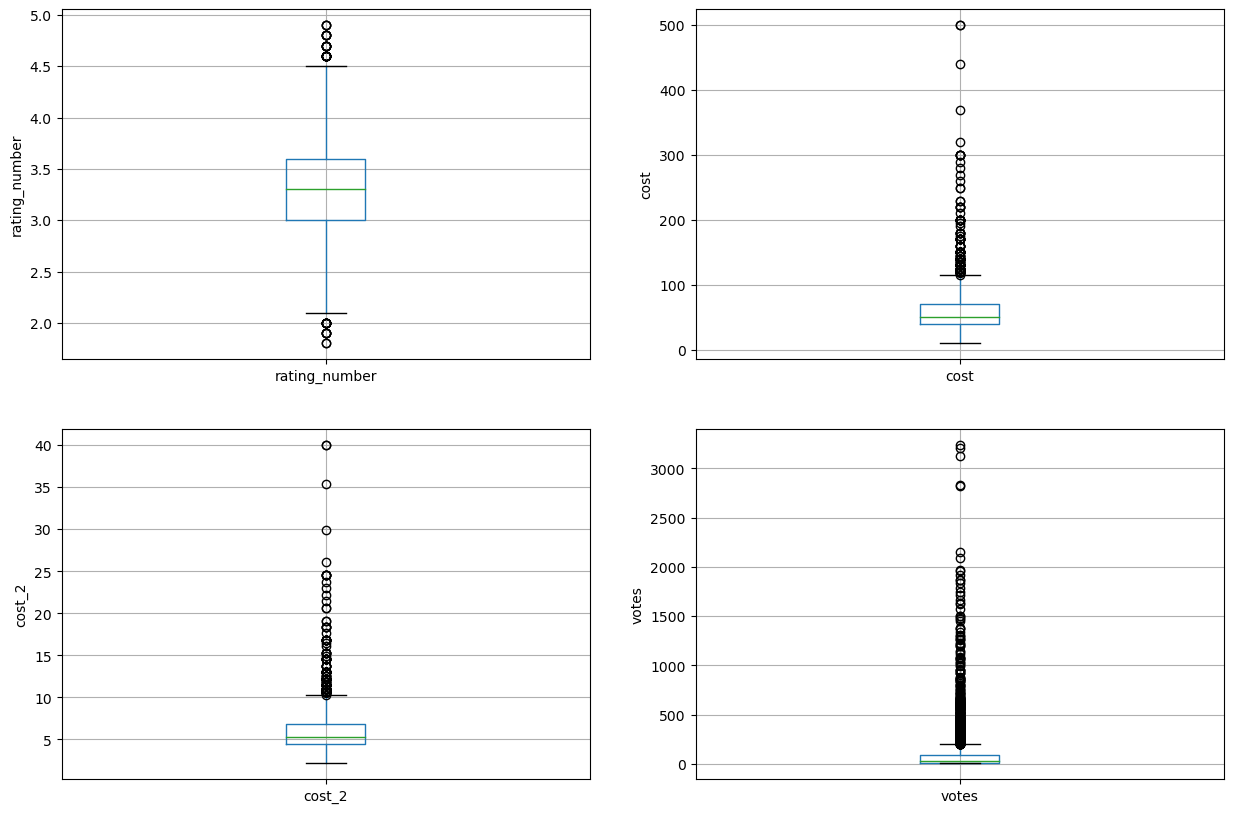

In [2016]:
# Let's draw boxplots to visualise outliers in these variables
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
fig = df.boxplot(column= 'rating_number')
fig.set_title('')
fig.set_ylabel('rating_number')

plt.subplot(2,2,2)
fig = df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('cost')

plt.subplot(2,2,3)
fig = df.boxplot(column= 'cost_2')
fig.set_title('')
fig.set_ylabel('cost_2')

plt.subplot(2,2,4)
fig = df.boxplot(column= 'votes')
fig.set_title('')
fig.set_ylabel('votes')

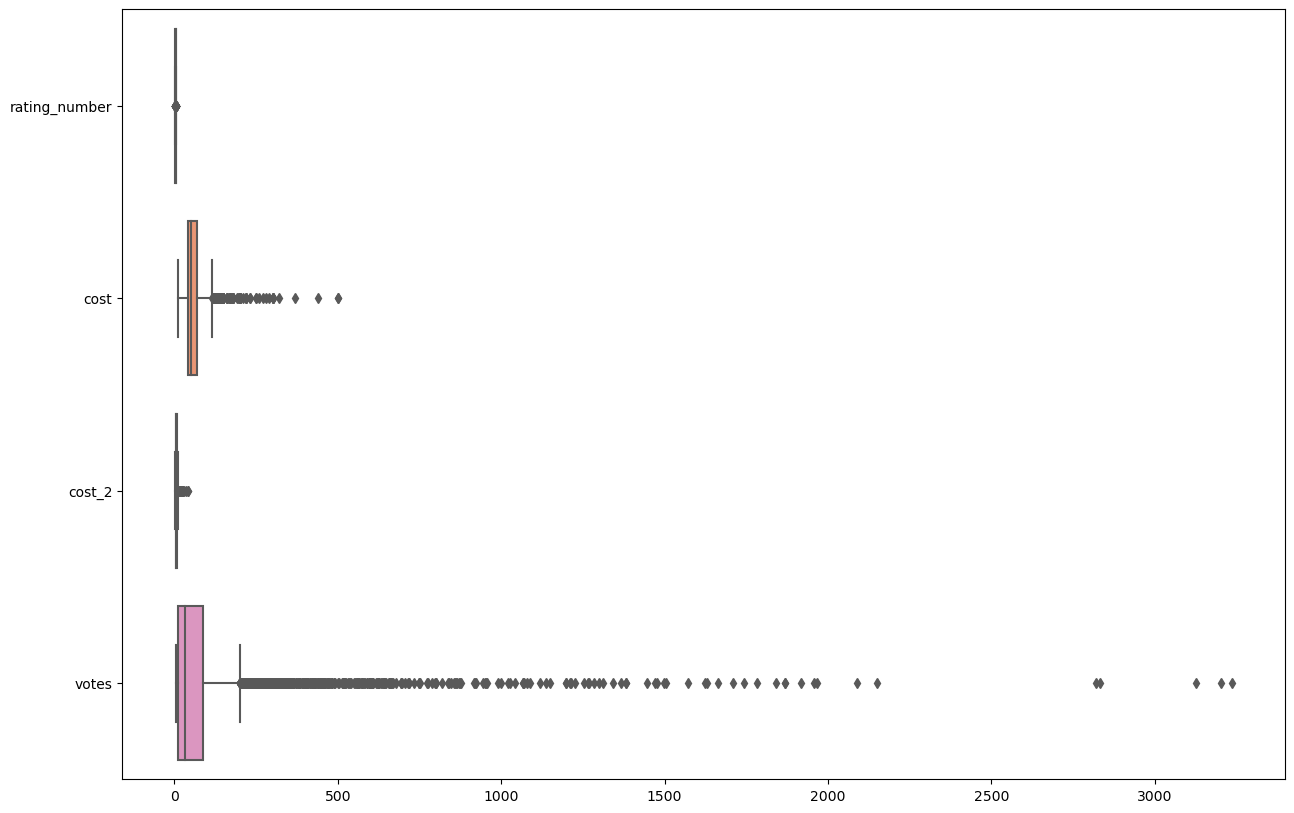

In [2017]:
# we can also use seaborn library to plot elegant ones
df_custom = df[['rating_number', 'cost', 'cost_2', 'votes']]
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

In [2018]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df['cuisine'].hist(bins=10)
fig.set_xlabel('cuisine')
fig.set_ylabel('rating_number')


plt.subplot(2, 2, 2)
fig = df.cost.hist(bins=10)
fig.set_xlabel('cost')
fig.set_ylabel('rating_number')


plt.subplot(2, 2, 3)
fig = df.cost_2.hist(bins=10)
fig.set_xlabel('cost_2')
fig.set_ylabel('rating_number')


plt.subplot(2, 2, 4)
fig = df.votes.hist(bins=10)
fig.set_xlabel('votes')
fig.set_ylabel('rating_number')

Text(0, 0.5, 'rating_number')

In [2019]:
# Find aoutliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [2020]:
_,_,_ = find_outliers('cost')

cost outliers are values < -50.0 or > 160.0


In [2021]:
_,_,_ = find_outliers('rating_number')

rating_number outliers are values < 1.1999999999999997 or > 5.4


In [2022]:
_,_,_ = find_outliers('votes')

votes outliers are values < -213.0 or > 312.0


In [2023]:
_,_,_ = find_outliers('cost_2')

cost_2 outliers are values < -2.4796747979999987 or > 13.739837398999999


In [2024]:
X = df.drop(['rating_number'], axis=1)
y = df['rating_number']

In [2025]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5747, 8) (5747,)
(1437, 8) (1437,)


### Feature engineering

In [2026]:
X_train.dtypes

cost           float64
cuisine         object
rating_text     object
subzone         object
type            object
votes          float64
groupon           bool
cost_2         float64
dtype: object

In [2027]:
X_train.dtypes

cost           float64
cuisine         object
rating_text     object
subzone         object
type            object
votes          float64
groupon           bool
cost_2         float64
dtype: object

In [2028]:
# display categorical variables
categorical = [var for var in X_train.columns if X_train[var].dtype in ['O', 'bool']]
categorical

['cuisine', 'rating_text', 'subzone', 'type', 'groupon']

In [2029]:
# display numerical variables
numericals = [var for var in X_train.columns if X_train[var].dtypes not in ['O','bool']]
numericals

['cost', 'votes', 'cost_2']

In [2030]:
# display missing values
X_train[numericals].isnull().sum()

cost      0
votes     0
cost_2    0
dtype: int64

In [2031]:
# I could do the same for the text data
X_test[numericals].isnull().sum()

cost      0
votes     0
cost_2    0
dtype: int64

In [2032]:
# percentage of missing values in each variable
round(X_train[numericals].isnull().mean(), 2)

cost      0.0
votes     0.0
cost_2    0.0
dtype: float64

In [2033]:
# Impute the missing values with the median values -- median is robust with the outliers
for df_temp in [X_train, X_test]:
    for col in numericals:
        col_median = X_train[col].median() # get it only from training
        df_temp[col].fillna(col_median, inplace=True)

In [2034]:
# check again missing values in numerical variables in X_train
X_train[numericals].isnull().sum()

cost      0
votes     0
cost_2    0
dtype: int64

In [2035]:
# check missing values in numerical variables in X_test
X_test[numericals].isnull().sum()

cost      0
votes     0
cost_2    0
dtype: int64

In [2036]:
round(X_train[categorical].isnull().mean(), 2)

cuisine        0.0
rating_text    0.0
subzone        0.0
type           0.0
groupon        0.0
dtype: float64

In [2037]:
# impute missing categorical variables with most frequent value (i.e., mode)
for df_temp in [X_train, X_test]:
    for col in categorical:
        col_mode = X_train[col].mode()[0] # get it only from training
        df_temp[col].fillna(col_mode, inplace=True)

In [2038]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

cuisine        0
rating_text    0
subzone        0
type           0
groupon        0
dtype: int64

In [2039]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()


cuisine        0
rating_text    0
subzone        0
type           0
groupon        0
dtype: int64

In [2040]:
# Replace the outliers with some predefined the maximum value for each variable
def max_value(df_temp, variable, top):
    return np.where(df_temp[variable]>top, top, df_temp[variable])

cols_with_outliers = {'cost': 160, 
                      'cost_2': 13, 
                      'votes': 312,
                     }
for df_temp in [X_train, X_test]:
    for col in cols_with_outliers:
        df_temp[col] = max_value(df_temp, col, cols_with_outliers[col])

In [2041]:
X_train.cost.max(), X_test.cost.max()

(160.0, 160.0)

In [2042]:
X_train.cost_2.max(), X_test.cost_2.max()

(13.0, 13.0)

In [2043]:
X_train.votes.max(), X_test.votes.max()

(312.0, 312.0)

In [2044]:
# Check column names
print(X_train.columns)

Index(['cost', 'cuisine', 'rating_text', 'subzone', 'type', 'votes', 'groupon',
       'cost_2'],
      dtype='object')


In [2045]:
# we can also use seaborn library to plot elegant ones
df_custom = X_train[['cost','cost_2','votes']]
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

## II. Regression:

In [2046]:
X_train[categorical].head()

cuisine rating_text  \
2653                          ['Cafe']     Average   
2707                          ['Thai']        Good   
3190             ['Vietnamese', 'Pho']     Average   
3763                        ['Indian']     Average   
2715  ['Poké', 'Hawaiian', 'Japanese']     Average   

                            subzone               type  groupon  
2653                     Willoughby           ['Café']    False  
2707                        Balmain  ['Casual Dining']    False  
3190                        Hornsby  ['Casual Dining']    False  
3763                       Cremorne  ['Casual Dining']    False  
2715  Greenwood Plaza, North Sydney  ['Casual Dining']    False

In [2047]:
X_train[numericals].head()

cost  votes    cost_2
2653  30.0   36.0  3.699187
2707  50.0   54.0  5.243902
3190  40.0   56.0  4.471545
3763  70.0   22.0  6.788618
2715  40.0   16.0  4.471545

In [2048]:
X_train.head()

cost                           cuisine rating_text  \
2653  30.0                          ['Cafe']     Average   
2707  50.0                          ['Thai']        Good   
3190  40.0             ['Vietnamese', 'Pho']     Average   
3763  70.0                        ['Indian']     Average   
2715  40.0  ['Poké', 'Hawaiian', 'Japanese']     Average   

                            subzone               type  votes  groupon  \
2653                     Willoughby           ['Café']   36.0    False   
2707                        Balmain  ['Casual Dining']   54.0    False   
3190                        Hornsby  ['Casual Dining']   56.0    False   
3763                       Cremorne  ['Casual Dining']   22.0    False   
2715  Greenwood Plaza, North Sydney  ['Casual Dining']   16.0    False   

        cost_2  
2653  3.699187  
2707  5.243902  
3190  4.471545  
3763  6.788618  
2715  4.471545

In [2049]:
# RainToday is binary, we can use the BinaryEncoder to create a one-hot encoder for it
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['groupon'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

le = LabelEncoder()
X_train['cuisine'] = le.fit_transform(X_train.cuisine)
X_train['type'] = le.fit_transform(X_train.type)
X_test['cuisine'] = le.fit_transform(X_test.cuisine)
X_test['type'] = le.fit_transform(X_test.type)
X_train['subzone'] = le.fit_transform(X_train.subzone)
X_test['subzone'] = le.fit_transform(X_test.subzone)


In [2050]:
X_train.head()

cost  cuisine rating_text  subzone  type  votes  groupon_0  groupon_1  \
2653  30.0      408     Average      474    18   36.0          0          1   
2707  50.0     1144        Good       16    27   54.0          0          1   
3190  40.0     1176     Average      180    27   56.0          0          1   
3763  70.0      668     Average      105    27   22.0          0          1   
2715  40.0      997     Average      165    27   16.0          0          1   

        cost_2  
2653  3.699187  
2707  5.243902  
3190  4.471545  
3763  6.788618  
2715  4.471545

In [2051]:
# Now let's create training set
X_train = pd.concat([X_train[numericals], X_train[['groupon_0', 'groupon_1']],
                     X_train['cuisine'], 
                     pd.get_dummies(X_train.rating_text),
                     X_train['subzone'],
                     X_train['type']], axis=1)

In [2052]:
X_train.head()

cost  votes    cost_2  groupon_0  groupon_1  cuisine  Average  \
2653  30.0   36.0  3.699187          0          1      408        1   
2707  50.0   54.0  5.243902          0          1     1144        0   
3190  40.0   56.0  4.471545          0          1     1176        1   
3763  70.0   22.0  6.788618          0          1      668        1   
2715  40.0   16.0  4.471545          0          1      997        1   

      Excellent  Good  Poor  Very Good  subzone  type  
2653          0     0     0          0      474    18  
2707          0     1     0          0       16    27  
3190          0     0     0          0      180    27  
3763          0     0     0          0      105    27  
2715          0     0     0          0      165    27

In [2053]:
# let's create test set
X_test = pd.concat([X_test[numericals], X_test[['groupon_0', 'groupon_1']],
                     X_test['cuisine'], 
                     pd.get_dummies(X_test.rating_text),
                     X_test['subzone'],
                     X_test['type']], axis=1)

In [2054]:
X_test.head()

cost  votes    cost_2  groupon_0  groupon_1  cuisine  Average  \
1667  95.0   92.0  8.719512          0          1      264        1   
1835  30.0  152.0  3.699187          0          1       54        0   
4511  20.0    9.0  2.926829          0          1      327        1   
6088  40.0    5.0  4.471545          0          1      155        1   
913   75.0   36.0  7.174797          0          1      389        0   

      Excellent  Good  Poor  Very Good  subzone  type  
1667          0     0     0          0      324    19  
1835          0     1     0          0      237     0  
4511          0     0     0          0      166    25  
6088          0     0     0          0       94    14  
913           0     1     0          0      216    19

### feature scaling or standardiztion

In [2055]:
# first keep the column name to get the DF back
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# get the DFs back
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()


cost     votes    cost_2 groupon_0 groupon_1   cuisine Average  \
0  0.133333  0.103896  0.142429       0.0       1.0  0.344013     1.0   
1  0.266667  0.162338  0.284858       0.0       1.0  0.964587     0.0   
2  0.200000  0.168831  0.213643       0.0       1.0  0.991568     1.0   
3  0.400000  0.058442  0.427286       0.0       1.0  0.563238     1.0   
4  0.200000  0.038961  0.213643       0.0       1.0  0.840641     1.0   

  Excellent Good Poor Very Good   subzone      type  
0       0.0  0.0  0.0       0.0  0.969325  0.382979  
1       0.0  1.0  0.0       0.0  0.032720  0.574468  
2       0.0  0.0  0.0       0.0  0.368098  0.574468  
3       0.0  0.0  0.0       0.0  0.214724  0.574468  
4       0.0  0.0  0.0       0.0  0.337423  0.574468

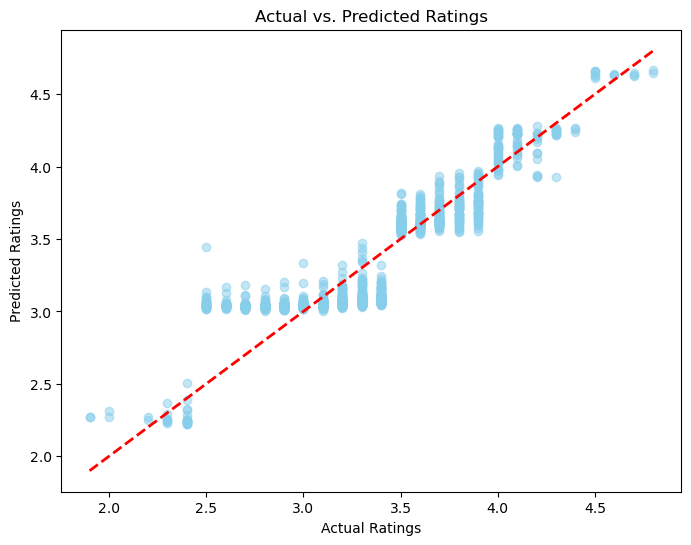

Mean Squared Error (MSE) of Regression_Model_1 is: 0.04
R-squared (R2) of Regression_Model_1 is: 0.80


In [2056]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a linear regression model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_regression_1.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5,color='skyblue')  # Scatter plot
plt.xlabel("Actual Ratings")  # X-axis label
plt.ylabel("Predicted Ratings")  # Y-axis label
plt.title("Actual vs. Predicted Ratings")  # Plot title

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) of Regression_Model_1 is: {mse:.2f}")
print(f"R-squared (R2) of Regression_Model_1 is: {r2:.2f}")


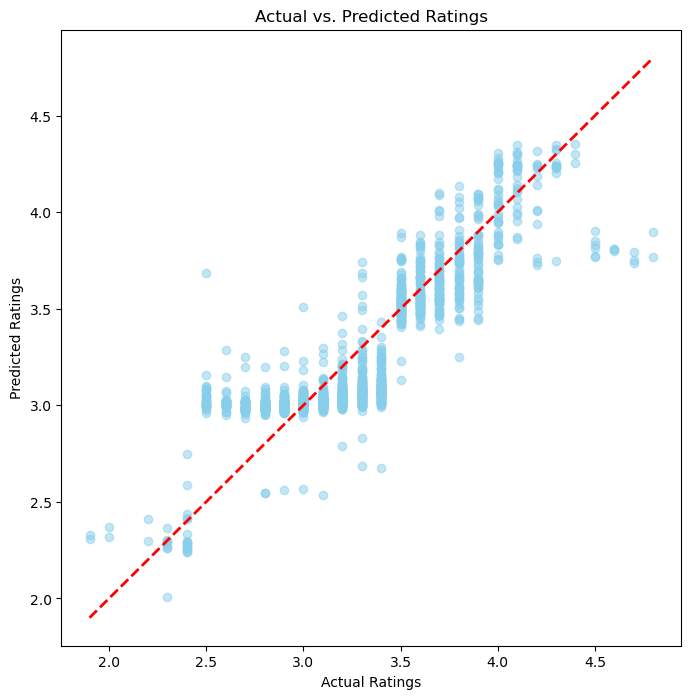

 Mean Squared Error (MSE) of Regression_Model_2 is: 0.05
R-squared (R2) of Regression_Model_2 is: 0.75


In [2057]:
from sklearn.linear_model import SGDRegressor

# Create and train a linear regression model
model_regression_2 = SGDRegressor(max_iter=10000, random_state=0)
model_regression_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_regression_2.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5,color='skyblue')  # Scatter plot
plt.xlabel("Actual Ratings")  # X-axis label
plt.ylabel("Predicted Ratings")  # Y-axis label
plt.title("Actual vs. Predicted Ratings")  # Plot title

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) of Regression_Model_2 is: {mse:.2f}")
print(f"R-squared (R2) of Regression_Model_2 is: {r2:.2f}")

## III. Classification

In [2058]:
# Define a mapping of ratings to binary classes
rating_mapping = {
    'Poor': 1,
    'Average': 1,
    'Good': 2,
    'Very Good': 2,
    'Excellent': 2
}

# Create the binary target variable
df['rating_class'] = df['rating_text'].map(rating_mapping)



# Verify the new 'class' column
print(df['rating_class'].value_counts())


1    4710
2    2474
Name: rating_class, dtype: int64


In [2059]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the features and target variable
features = ['cost', 'votes', 'cost_2']  # Adjust the list of features as needed
X = df[features]
y = df['rating_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the logistic regression model
model_classification_3 = LogisticRegression(random_state=0)
model_classification_3.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = model_classification_3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report (includes precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2'])
print('Classification Report:\n', classification_rep)


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

     Class 1       0.83      0.93      0.88       945
     Class 2       0.83      0.63      0.71       492

    accuracy                           0.83      1437
   macro avg       0.83      0.78      0.80      1437
weighted avg       0.83      0.83      0.82      1437



In [2065]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model_classification_3.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print other classification metrics (optional)
from sklearn.metrics import classification_report
print('Confusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)



Confusion Matrix:
 [[880  65]
 [183 309]]

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.83      0.93      0.88       945
     Class 2       0.83      0.63      0.71       492

    accuracy                           0.83      1437
   macro avg       0.83      0.78      0.80      1437
weighted avg       0.83      0.83      0.82      1437



## Conclusion and Analyzing

#### Analyzing the classification report reveals the following insights:

The overall accuracy of the model is 0.83, indicating that the model performs well for all categories of classification.

For records labeled as 'Poor' and 'Average' (Class 1):

Precision: 0.83, suggesting that when the model predicts a record as 'Poor' or 'Average', there's an 83% chance it is correct.

Recall: 0.93, indicating that 93% of the actual 'Poor' and 'Average' records were correctly identified by the model.

F1 Score: 0.88, a balanced measure considering both precision and recall.

For records labeled as 'Good', 'Very Good', and 'Excellent' (Class 2):

Precision: 0.83, meaning that when the model predicts a record as 'Good', 'Very Good', or 'Excellent', there's an 83% chance it is correct.

Recall: 0.63, showing that 63% of the actual 'Good', 'Very Good', and 'Excellent' records were correctly identified by the model.

F1 Score: 0.71, indicating a relatively lower performance in this category compared to Class 1.

Overall Performance Observations:

The model exhibits significantly better performance for records labeled as 'Poor' and 'Average' (Class 1) compared to records labeled as 'Good', 'Very Good', and 'Excellent' (Class 2).

